# TME 1 - Arbres de décision, sélection de modèles

## Exercice 1 – Entropie

In [1]:
# Libraries
import numpy as np
import collections

In [2]:
# 1.1
def entropie(vect):
	cpt = collections.Counter()
	for pos in vect:
		cpt[pos] += 1
	H = 0
	for i in cpt:
		py = cpt[i] / len(vect)
		H += py * np.log(py)
	return -H

In [3]:
# tests pour l'entropie
# plus on a la diffrence des valeurs en qunatite, moins est l'entropie (la mesure de la surprise)
l1 = [1, 2, 3]
l2 = [1, 1, 1]
l3 = [1, 2, 2]
print(entropie(l1))
print(entropie(l2))
print(entropie(l3))

1.0986122886681096
-0.0
0.6365141682948128


In [4]:
# 1.2
# la moyenne pondérée des entropies des sous-ensembles obtenus
def entropie_cond(list_vect):
	H_cond = 0
	nbElem = 0
	# calcul du nombre des elements de chaque partition Pi
	for vect in list_vect:
		nbElem += len(vect)
	# parcours de chaque partition et calcul de sa valeur entropie
	for vect in list_vect:
		H = entropie(vect)
		# calcul probabilite d'avoir une partition Pi
		pi = len(vect) / nbElem
		H_cond += pi * entropie(vect)
	return H_cond

In [5]:
# tests pour l'entropie conditionnelle
# soit les labels sont dans l'ensemble {1,2,3}
list_vect = [l1] + [l2] + [l3]
print("Liste des listes des labels : ", list_vect)
entropie_cond(list_vect)

Liste des listes des labels :  [[1, 2, 3], [1, 1, 1], [1, 2, 2]]


0.5783754856543074

In [6]:
# 1.3
import pickle
# data : tableau (films ,features), id2titles : dictionnaire id -> titre , # fields : id feature -> nom
[data, id2titles, fields]=pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax=data[:,:32]
# la note moyenne situee a la 33 colonne dans data, on mets a 1 la valeur dans le tableau aux films de note supérieure à 6.5, et les autres
datay=np.array([1 if x[33]>6.5 else -1 for x in data])

In [7]:
# tests
print(np.shape(datax))
print(np.shape(datay))
print(datay[:5])
print(datax[:5, :5])
print(data[:, 33])

(4587, 32)
(4587,)
[-1  1  1  1 -1]
[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
[5.5 7.8 6.9 ... 6.8 6.9 5.5]


$X$ : ensemble des donnees  
$Y$ : etiquiette (positif ou negatif)  
$T$ : test sur un des attributs, on obtient 2 partitions d'exemples de $X$ : $X1$ et $X2$  
$X1$ : verifie le test  
$X2$ : ne le verifie pas  
${H(Y | T)}$ = ${|X|}$

L'idee
- on choisit aleatoirement des attributs dans l'ensemble des donnees ${datax}$
- on calcule l'entropie des deux classes des films (note film > 6.5 et les autres)

In [8]:
# Calculer pour chaque attribut binaire l’entropie et l’entropie conditionnelle du vote
# selon la partition induite par l’attribut (les exemples dont la valeur de l’attribut est 1 vs les autres)
import random

def partitonner_data(nbPart, nbElem, datay):
	list_vect = []
	for i in range(nbPart):
		vect = []
		for j in range(nbElem):
			# choisir un film au hasard
			n = random.randint(0, len(datay) - 1)
			# assigner son appartenance a la classe 1 ou -1
			vect.append(datay[n])
		list_vect.append(vect)
	print(list_vect)
	return list_vect
partitonner_data(5, 5, datay)

[[-1, -1, -1, 1, 1], [-1, 1, 1, -1, 1], [-1, -1, 1, 1, -1], [-1, -1, 1, 1, -1], [1, 1, -1, 1, 1]]


[[-1, -1, -1, 1, 1],
 [-1, 1, 1, -1, 1],
 [-1, -1, 1, 1, -1],
 [-1, -1, 1, 1, -1],
 [1, 1, -1, 1, 1]]

In [9]:
list_vect = partitonner_data(5, 5, datay)
entropie_cond(list_vect)

[[1, 1, 1, 1, 1], [1, -1, -1, 1, 1], [-1, 1, 1, -1, 1], [-1, -1, 1, 1, 1], [1, -1, 1, -1, 1]]


0.5384093336074053

# Quelques expériences préliminaires

In [11]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus

id2genre = [x[1] for x in sorted(fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 3 # on fixe la taille max de l’arbre a 5
dt.min_samples_split = 2 #nombre minimum d’exemples pour spliter un noeud
dt.fit(datax ,datay)
dt.predict(datax[:5,:])
print(dt.score(datax,datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/Graphviz export_graphviz(dt, out_file="/tmp/tree.dot",feature_names=id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt,feature_names=id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree5.pdf")

0.7183344233703945


True

### 1.4
Le nombre d'exemples depend de la profoneur de l'arbre. En effet, ${nb\_ex}$ = $2^{prof\_arbre}$
### 1.5
On remarque que le pourcentage de bonne classification des données s'ameliore quand on augmente la profondeur de l'arbre de decision. Cela s'explique grace aux nombres d'exemples qui devient de plus en plus grand et qui permet d'avoir le meilleur taux de classification.
### 1.6

In [12]:
# 1.7
import matplotlib.pyplot as plt
# partages en (0.2,0.8),(0.5,0.5),(0.8,0.2)
# l’erreur en apprentissage et de l’erreur en test en fonction de la profondeur du modèle

# l’erreur en apprentissage
def train_error(datax, datay, perc):
	xl = len(datax)
	yl = len(datay)
	# pourcentage des donnees choisies
	dx = datax[int(xl * perc):, :]
	dy = datay[int(yl * perc):]
	x = []
	y = []
	for i in range(3, 30, 2):
		dt = DTree ()
		dt.max_depth = i
		# apprendre le modèle sur les données en paramètre
		dt.fit(dx, dy)
		dt.predict(dx)
		# erreur = 1 - taux de bonne classification
		y.append(1 - dt.score(dx, dy))
		# profondeur de l'arbre
		x.append(i)
	return (x, y)

# l’erreur en test
def test_error(datax, datay, perc):
	xl = len(datax)
	yl = len(datay)
	# pourcentage des donnees choisies
	dx = datax[int(xl * perc):, :]
	dy = datay[int(yl * perc):]
	x = []
	y = []
	for i in range(3, 30, 2):
		dt = DTree ()
		dt.max_depth = i
		# apprendre le modèle sur les données en paramètre
		dt.fit(dx, dy)
		dt.predict(dx)
		# erreur = 1 - taux de bonne classification
		y.append(1 - dt.score(dx, dy))
		# profondeur de l'arbre
		x.append(i)
	return (x, y)

Text(0.5, 1.0, 'Partitionnement (0.2, 0.8)')

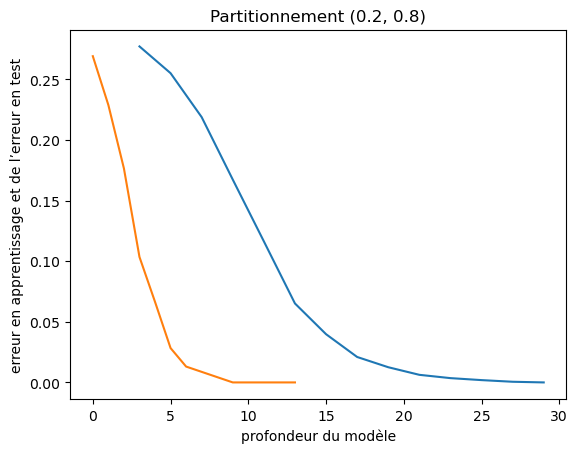

In [13]:
# Partitionnement (0.2, 0.8)
x, ytrain = train_error(datax, datay, 0.2)
x, ytest = test_error(datax, datay, 0.8)
plt.plot(x, ytrain, ytest)
plt.xlabel('profondeur du modèle')
plt.ylabel('erreur en apprentissage et de l’erreur en test')
plt.title('Partitionnement (0.2, 0.8)')

Text(0.5, 1.0, 'Partitionnement (0.5, 0.5)')

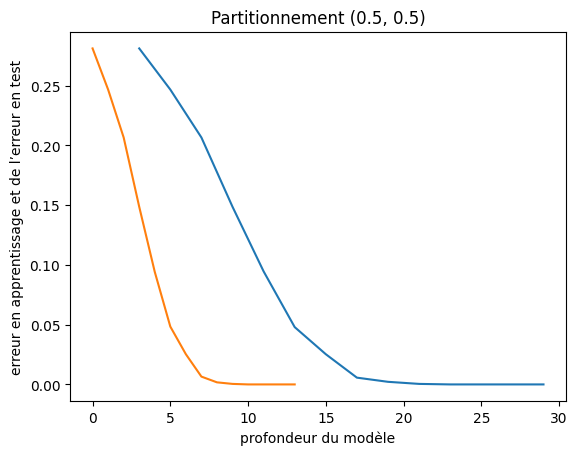

In [ ]:
# Partitionnement (0.5, 0.5)
x, ytrain = train_error(datax, datay, 0.5)
x, ytest = test_error(datax, datay, 0.5)
plt.plot(x, ytrain, ytest)
plt.xlabel('profondeur du modèle')
plt.ylabel('erreur en apprentissage et de l’erreur en test')
plt.title('Partitionnement (0.5, 0.5)')

Text(0.5, 1.0, 'Partitionnement (0.8, 0.2)')

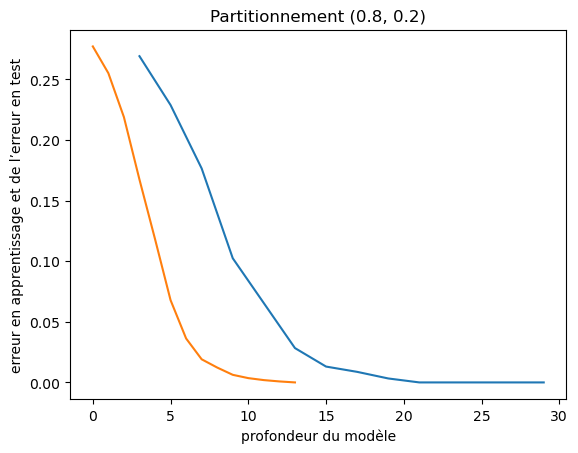

In [14]:
# Partitionnement (0.8, 0.2)
x, ytrain = train_error(datax, datay, 0.8)
x, ytest = test_error(datax, datay, 0.2)
plt.plot(x, ytrain, ytest)
plt.xlabel('profondeur du modèle')
plt.ylabel('erreur en apprentissage et de l’erreur en test')
plt.title('Partitionnement (0.8, 0.2)')

# Validation croisée : sélection de modèle

In [ ]:
# def cross_val(datax, datay, part):
# 	xl = len(datax)
# 	yl = len(datay)

# 	for i in range(int(xl / part)):
# 		dt = DTree ()
# 		dt.max_depth = i
# 		dx = datax[int(xl * perc):, :]
# 		dy = datay[int(yl * perc):]

# 		# apprendre le modèle sur les données en paramètre
# 		dt.fit(dx, dy)
# 		dt.predict(dx)
# 		# erreur = 1 - taux de bonne classification
# 		error = 1 - dt.score(dx, dy)
		
# 	# on renvoie le modele avec l'erreur moyenne la plus petite
# 	return (i, minError)

In [15]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso()
for i in range(2, 10):
	# cv : determines the cross-validation splitting strategy
	print(cross_val_score(lasso, datax, datay, cv=i))

[0.12231479 0.12587348]
[0.13012408 0.11585164 0.12624984]
[0.14043127 0.09433156 0.12804166 0.12829328]
[0.14084226 0.12152288 0.10470502 0.13087908 0.12441041]
[0.14352409 0.11806501 0.08971089 0.13616756 0.13327455 0.11977016]
[0.14016872 0.12248455 0.11034821 0.11998245 0.12743951 0.12849092
 0.11797802]
[0.14239403 0.14094872 0.10560449 0.07074612 0.13729943 0.12182735
 0.13330672 0.12415746]
[0.14433721 0.14253963 0.10164043 0.10585224 0.12863101 0.11530608
 0.11771774 0.14383304 0.1141389 ]
